Task 1: Restaurant Reviews

-Analyze the text reviews to identify the most common positive and negative keywords.

-Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [1]:
import pandas as pd

data = pd.read_csv('Dataset .csv')
data.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [2]:
data['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [3]:
rating_text_counts =data['Rating text'].value_counts()

positive_texts = [ "Excellent",  'Very Good', 'Good']
negative_texts = ['Average', 'Poor']

positive_counts = rating_text_counts[rating_text_counts.index.isin(positive_texts)]
negative_counts = rating_text_counts[rating_text_counts.index.isin(negative_texts)]


In [4]:
[positive_counts] ,[negative_counts]


([Rating text
  Good         2100
  Very Good    1079
  Excellent     301
  Name: count, dtype: int64],
 [Rating text
  Average    3737
  Poor        186
  Name: count, dtype: int64])

Analyze the text reviews to identify the most common positive and negative keywords

In [42]:
print("Most common Positive word in reviews:",positive_counts.head(1).index.values)
print("Most common Negative word in reviews:",negative_counts.head(1).index.values)

Most common Positive word in reviews: ['Good']
Most common Negative word in reviews: ['Average']


Calculate the average length of reviews and explore if there is a relationship between review length and rating

In [43]:
data['Review Length'] = data['Rating text'].apply(lambda x: len(str(x)))
average_review_length = round(data['Review Length'].mean())
average_review_length

7

In [44]:
data.groupby('Aggregate rating')[['Review Length',"Aggregate rating"]].head(10)

,Review Length,Aggregate rating
0,9,4.8
1,9,4.5
2,9,4.4
3,9,4.9
4,9,4.8
...,...,...
7706,4,2.0
8532,4,2.0
9104,4,2.0
9105,4,2.0


In [59]:

# Exclude rows with 'Rating color' as 'White'
data = data[data['Rating color'] != 'White']

# Add a new column for review length
data['Review Length string'] = data['Rating text'].apply(lambda x: len(str(x)))

# Visualize the relationship using a box plot
data[["Review Length string" , "Aggregate rating","Rating text",'Rating color']].drop_duplicates()



,Review Length string,Aggregate rating,Rating text,Rating color
0,9,4.8,Excellent,Dark Green
1,9,4.5,Excellent,Dark Green
2,9,4.4,Very Good,Green
3,9,4.9,Excellent,Dark Green
6,9,4.0,Very Good,Green
7,9,4.2,Very Good,Green
14,9,4.3,Very Good,Green
15,4,3.6,Good,Yellow
20,9,4.7,Excellent,Dark Green
22,7,3.0,Average,Orange


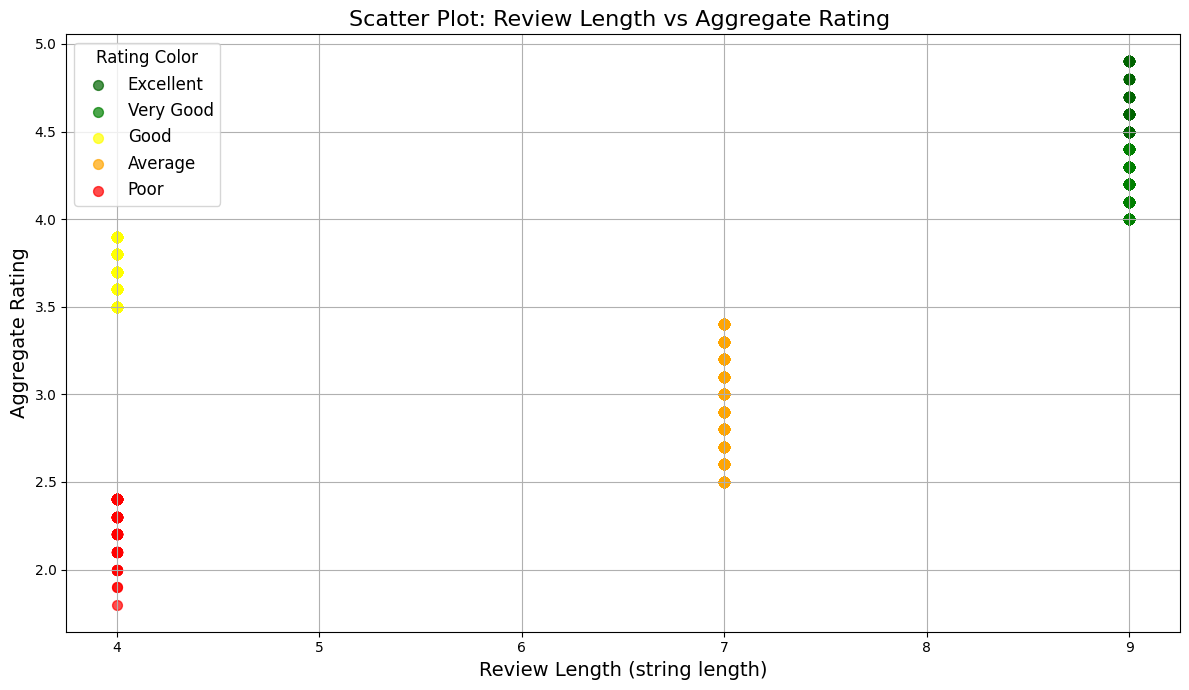

In [76]:
import matplotlib.pyplot as plt

rating_color_map = {
    "Excellent": "#006400",
    "Very Good": "#008000",
    "Good": "#FFFF00",
    "Average": "#FFA500",
    "Poor": "#FF0000"
}


data['Color'] = data['Rating text'].map(rating_color_map)


plt.figure(figsize=(12, 7))


for rating_text in rating_color_map.keys():  
    group = data[data['Rating text'] == rating_text]
    plt.scatter(group['Review Length string'], group['Aggregate rating'],
                color=rating_color_map[rating_text], label=rating_text, alpha=0.7, s=50)


plt.title('Scatter Plot: Review Length vs Aggregate Rating ', fontsize=16)
plt.xlabel('Review Length (string length)', fontsize=14)
plt.ylabel('Aggregate Rating', fontsize=14)
plt.grid(True)


plt.legend(title='Rating Color', loc='upper left', fontsize=12, title_fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


-Shorter review lengths (e.g., 4, "Poor") tend to align with lower aggregate ratings (around 2.0 to 2.5).

-Medium review lengths (e.g., 7, "Average") align with moderate aggregate ratings (around 3.0 to 3.5).

-Longer review lengths (e.g., 9, "Excellent") correlate with higher aggregate ratings (4.5 to 5.0).


The scatter plot shows a clear relationship where longer review texts ("Excellent," "Very Good") are associated with higher aggregate ratings, while shorter texts ("Poor," "Average") are linked to lower ratings.

-So there is a relation between reveiew length and aggregate ratting

